The purpose of this activity is to use Transfer Learning and realise that how the model forgets the old data and gets accustomed to the new data. 5 pairs of digits have been made, which are (0,1), (2,3), (4,5), (6,7) and (8,9). Let models and datasets related to them be labelled with A, B, C, D and E respectively. 5 models (ModelABCDE, ModelBCDEA, ModelCDEAB, ModelDEABC and ModelEABCD) would be trained such that say ModelABCDE would be trained of set A 1st, then transfer learning of the model would be done on B, then C, then D and the E. Lastly, Accuracy of all 5 models would be measured on all the 5 test sets.

Importing Libraries

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Mounted at /content/gdrive
11490434/11490434 [==============================] - 0s 0us/step


Distributing the dataset among the 5 sets

In [2]:
x_train_dict = {'A': [], 'B': [], 'C': [], 'D': [], 'E': []}
y_train_dict = {'A': [], 'B': [], 'C': [], 'D': [], 'E': []}
x_test_dict = {'A': [], 'B': [], 'C': [], 'D': [], 'E': []}
y_test_dict = {'A': [], 'B': [], 'C': [], 'D': [], 'E': []}

for i in range(len(y_train)):
  if y_train[i] == 0 or y_train[i] == 1:
    x_train_dict['A'].append(x_train[i])
    y_train_dict['A'].append(float(y_train[i]==1))       #y is 0 if image shows 0 and y is 1 if image shows 1
  if y_train[i] == 2 or y_train[i] == 3:
    x_train_dict['B'].append(x_train[i])
    y_train_dict['B'].append(float(y_train[i]==3))       #y is 0 if image shows 2 and y is 1 if image shows 3
  if y_train[i] == 4 or y_train[i] == 5:
    x_train_dict['C'].append(x_train[i])
    y_train_dict['C'].append(float(y_train[i]==5))       #y is 0 if image shows 4 and y is 1 if image shows 5
  if y_train[i] == 6 or y_train[i] == 7:
    x_train_dict['D'].append(x_train[i])
    y_train_dict['D'].append(float(y_train[i]==7))       #y is 0 if image shows 6 and y is 1 if image shows 7
  if y_train[i] == 8 or y_train[i] == 9:
    x_train_dict['E'].append(x_train[i])
    y_train_dict['E'].append(float(y_train[i]==9))       #y is 0 if image shows 8 and y is 1 if image shows 9

for i in range(len(y_test)):
  if y_test[i] == 0 or y_test[i] == 1:
    x_test_dict['A'].append(x_test[i])
    y_test_dict['A'].append(float(y_test[i]==1))       #y is 0 if image shows 0 and y is 1 if image shows 1
  if y_test[i] == 2 or y_test[i] == 3:
    x_test_dict['B'].append(x_test[i])
    y_test_dict['B'].append(float(y_test[i]==3))       #y is 0 if image shows 2 and y is 1 if image shows 3
  if y_test[i] == 4 or y_test[i] == 5:
    x_test_dict['C'].append(x_test[i])
    y_test_dict['C'].append(float(y_test[i]==5))       #y is 0 if image shows 4 and y is 1 if image shows 5
  if y_test[i] == 6 or y_test[i] == 7:
    x_test_dict['D'].append(x_test[i])
    y_test_dict['D'].append(float(y_test[i]==7))       #y is 0 if image shows 6 and y is 1 if image shows 7
  if y_test[i] == 8 or y_test[i] == 9:
    x_test_dict['E'].append(x_test[i])
    y_test_dict['E'].append(float(y_test[i]==9))       #y is 0 if image shows 8 and y is 1 if image shows 9

In [3]:
for i in ['A', 'B', 'C', 'D', 'E']:
  x_train_dict[i] = np.array(x_train_dict[i])
  y_train_dict[i] = np.array(y_train_dict[i])
  x_test_dict[i] = np.array(x_test_dict[i])
  y_test_dict[i] = np.array(y_test_dict[i])

Plotting first 8 images of all train sets

The first 8 examples in the train dataset A:


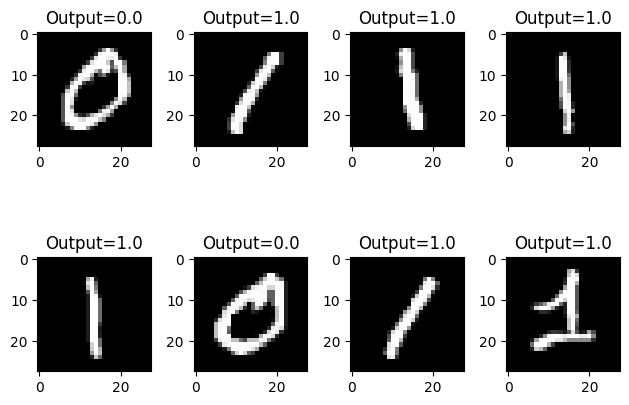

In [4]:
fig, axis = plt.subplots(2,4)
for i in range(8):
  axis[i//4, i%4].imshow(x_train_dict['A'][i], cmap='gray', vmin=0, vmax=255)
  axis[i//4, i%4].title.set_text("Output="+str(y_train_dict['A'][i]))
fig.tight_layout()
print("The first 8 examples in the train dataset A:")
fig.show()

The first 8 examples in the train dataset B:


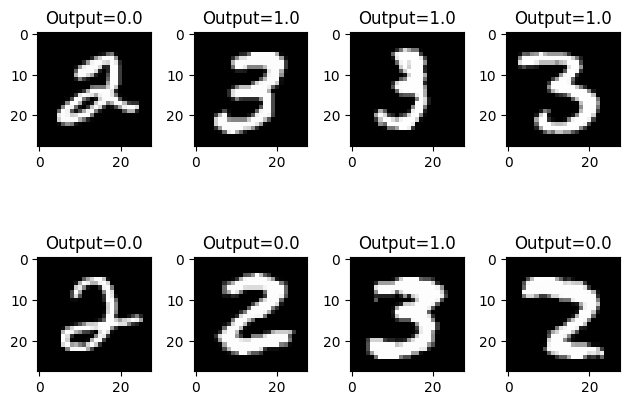

In [5]:
fig, axis = plt.subplots(2,4)
for i in range(8):
  axis[i//4, i%4].imshow(x_train_dict['B'][i], cmap='gray', vmin=0, vmax=255)
  axis[i//4, i%4].title.set_text("Output="+str(y_train_dict['B'][i]))
fig.tight_layout()
print("The first 8 examples in the train dataset B:")
fig.show()

The first 8 examples in the train dataset C:


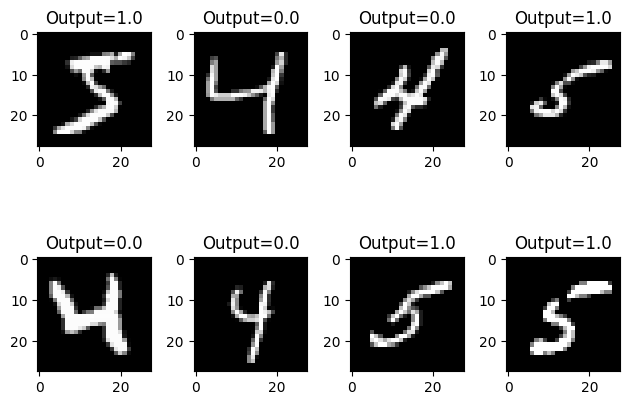

In [6]:
fig, axis = plt.subplots(2,4)
for i in range(8):
  axis[i//4, i%4].imshow(x_train_dict['C'][i], cmap='gray', vmin=0, vmax=255)
  axis[i//4, i%4].title.set_text("Output="+str(y_train_dict['C'][i]))
fig.tight_layout()
print("The first 8 examples in the train dataset C:")
fig.show()

The first 8 examples in the train dataset D:


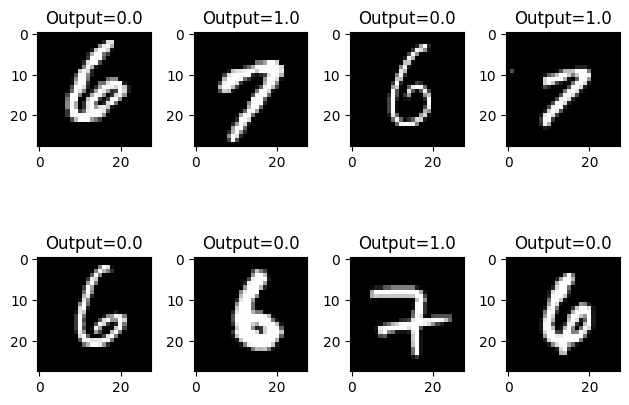

In [7]:
fig, axis = plt.subplots(2,4)
for i in range(8):
  axis[i//4, i%4].imshow(x_train_dict['D'][i], cmap='gray', vmin=0, vmax=255)
  axis[i//4, i%4].title.set_text("Output="+str(y_train_dict['D'][i]))
fig.tight_layout()
print("The first 8 examples in the train dataset D:")
fig.show()

The first 8 examples in the train dataset E:


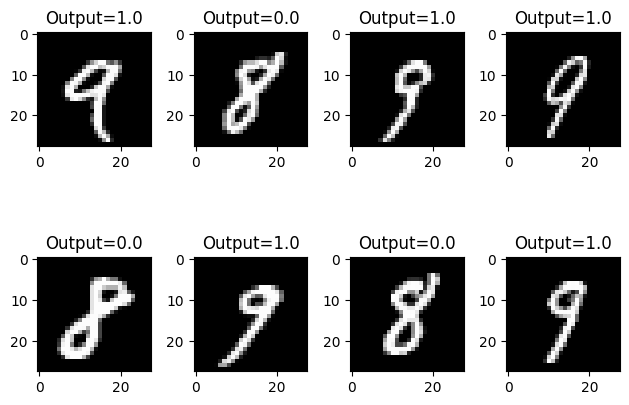

In [8]:
fig, axis = plt.subplots(2,4)
for i in range(8):
  axis[i//4, i%4].imshow(x_train_dict['E'][i], cmap='gray', vmin=0, vmax=255)
  axis[i//4, i%4].title.set_text("Output="+str(y_train_dict['E'][i]))
fig.tight_layout()
print("The first 8 examples in the train dataset E:")
fig.show()

Data Preprocessing

In [9]:
for i in ['A', 'B', 'C', 'D', 'E']:
  x_train_dict[i] = tf.cast(tf.expand_dims(x_train_dict[i], axis=3), tf.float32)
  x_test_dict[i] = tf.cast(tf.expand_dims(x_test_dict[i], axis=3), tf.float32)

Defining Model

In [10]:
def model(x_shape):
  input_img=tf.keras.Input(x_shape[1:]+(1,), dtype=tf.float32)
  A=tfl.Conv2D(4, (5,5))(input_img)                   #Size of A is (m,24,24,4)
  A=tfl.AveragePooling2D((2,2), (2,2))(A)             #Size of A is (m,12,12,4)
  A=tfl.Conv2D(12, (5,5))(A)                          #Size of A is (m,8,8,12)
  A=tfl.AveragePooling2D((2,2), (2,2))(A)             #Size of A is (m,4,4,12)
  A=tfl.Flatten()(A)                                  #Size of A is (m,4*4*12)
  A=tfl.Dense(1, activation='sigmoid')(A)
  return tf.keras.Model(input_img, A)

Model_dict = {'ABCDE':model(x_train.shape), 'BCDEA':model(x_train.shape), 'CDEAB':model(x_train.shape), 'DEABC':model(x_train.shape), 'EABCD':model(x_train.shape)}

Compiling the models

In [11]:
for i in ['ABCDE', 'BCDEA', 'CDEAB', 'DEABC', 'EABCD']:
  Model_dict[i].compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

Training the models

In [12]:
for i in ['ABCDE', 'BCDEA', 'CDEAB', 'DEABC', 'EABCD']:
  for j in range(5):
    Model_dict[i].fit(x_train_dict[i[j]], y_train_dict[i[j]], batch_size=64, epochs=20, callbacks=[tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/MNIST All Pairs Transfer Learning Model_'+i+' Chechpoint.h5', save_best_only=True, monitor='loss', mode='min')])

Epoch 1/20
198/198 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9924

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


198/198 [==============================] - 6s 21ms/step - loss: 0.0897 - accuracy: 0.9924
Epoch 2/20
198/198 [==============================] - 3s 16ms/step - loss: 0.0153 - accuracy: 0.9986
Epoch 3/20
198/198 [==============================] - 3s 16ms/step - loss: 0.0162 - accuracy: 0.9982
Epoch 4/20
198/198 [==============================] - 5s 27ms/step - loss: 0.0179 - accuracy: 0.9983
Epoch 5/20
198/198 [==============================] - 4s 21ms/step - loss: 0.0120 - accuracy: 0.9984
Epoch 6/20
198/198 [==============================] - 3s 17ms/step - loss: 0.0082 - accuracy: 0.9986
Epoch 7/20
198/198 [==============================] - 3s 17ms/step - loss: 0.0099 - accuracy: 0.9985
Epoch 8/20
198/198 [==============================] - 6s 28ms/step - loss: 0.0132 - accuracy: 0.9987
Epoch 9/20
198/198 [==============================] - 3s 17ms/step - loss: 0.0121 - accuracy: 0.9979
Epoch 10/20
198/198 [==============================] - 3s 16ms/step - loss: 0.0102 - accuracy: 0.9984


Evaluating the models

In [15]:
for i in ['ABCDE', 'BCDEA', 'CDEAB', 'DEABC', 'EABCD']:
  for j in ['A', 'B', 'C', 'D', 'E']:
    los, acc = Model_dict[i].evaluate(x_test_dict[j], y_test_dict[j], verbose=0)
    print("Loss & accuracy of model", i, "on test set", j, "are", round(los, 4), "and", round(acc, 4), "respectively.")
  print("______________________________________________________________________________________")

Loss & accuracy of model ABCDE on test set A are 4.3735 and 0.2809 respectively.
Loss & accuracy of model ABCDE on test set B are 2.6618 and 0.5715 respectively.
Loss & accuracy of model ABCDE on test set C are 7.1807 and 0.1078 respectively.
Loss & accuracy of model ABCDE on test set D are 1.205 and 0.7246 respectively.
Loss & accuracy of model ABCDE on test set E are 0.0574 and 0.9793 respectively.
______________________________________________________________________________________
Loss & accuracy of model BCDEA on test set A are 0.003 and 0.9991 respectively.
Loss & accuracy of model BCDEA on test set B are 4.6832 and 0.5695 respectively.
Loss & accuracy of model BCDEA on test set C are 2.1097 and 0.7188 respectively.
Loss & accuracy of model BCDEA on test set D are 5.0584 and 0.5352 respectively.
Loss & accuracy of model BCDEA on test set E are 7.2708 and 0.355 respectively.
______________________________________________________________________________________
Loss & accuracy of 

Final Accuracy Table
![picture](https://drive.google.com/uc?export=view&id=115AZF4bA69IgiqMejekTx62XLSghtd70)